In [1]:
#Importing the libraries we will use

import pandas as pd
import sklearn as sl
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import graphviz


In [2]:
# we get dataset in here

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

def iris_df():
    species_map=dict(zip(range(3),iris['target_names']))
    df['species']=[species_map[c]
                  for c in iris['target']]
    return df

In [3]:
df=iris_df()
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [4]:
#we split the dataset of train and test datasets
train, test = train_test_split(df, test_size=0.25)

# train dataset

we look the dataset

In [5]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
147,6.5,3.0,5.2,2.0,2.0,virginica
68,6.2,2.2,4.5,1.5,1.0,versicolor
131,7.9,3.8,6.4,2.0,2.0,virginica
16,5.4,3.9,1.3,0.4,0.0,setosa
135,7.7,3.0,6.1,2.3,2.0,virginica


In [6]:
train.shape

(112, 6)

# test dataset 

we look the dataset and it is rondom

In [7]:
test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
34,4.9,3.1,1.5,0.2,0.0,setosa
8,4.4,2.9,1.4,0.2,0.0,setosa
53,5.5,2.3,4.0,1.3,1.0,versicolor
55,5.7,2.8,4.5,1.3,1.0,versicolor
122,7.7,2.8,6.7,2.0,2.0,virginica


In [8]:
test.shape

(38, 6)

# Gini

In [9]:
#trains data with Gini index  Decision-Tree Classifier

tree_gini = tree.DecisionTreeClassifier()
tree_gini = tree_gini.fit(train[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]], train["species"])

[Text(446.4, 1223.1, 'X[2] <= 2.45\ngini = 0.664\nsamples = 112\nvalue = [38, 33, 41]'),
 Text(334.79999999999995, 951.3, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(558.0, 951.3, 'X[3] <= 1.75\ngini = 0.494\nsamples = 74\nvalue = [0, 33, 41]'),
 Text(223.2, 679.5, 'X[2] <= 5.05\ngini = 0.157\nsamples = 35\nvalue = [0, 32, 3]'),
 Text(111.6, 407.69999999999993, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(334.79999999999995, 407.69999999999993, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(223.2, 135.89999999999986, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.4, 135.89999999999986, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(892.8, 679.5, 'X[2] <= 4.85\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(781.1999999999999, 407.69999999999993, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(669.5999999999999, 135.89999999999986, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(892.8, 135.8999999

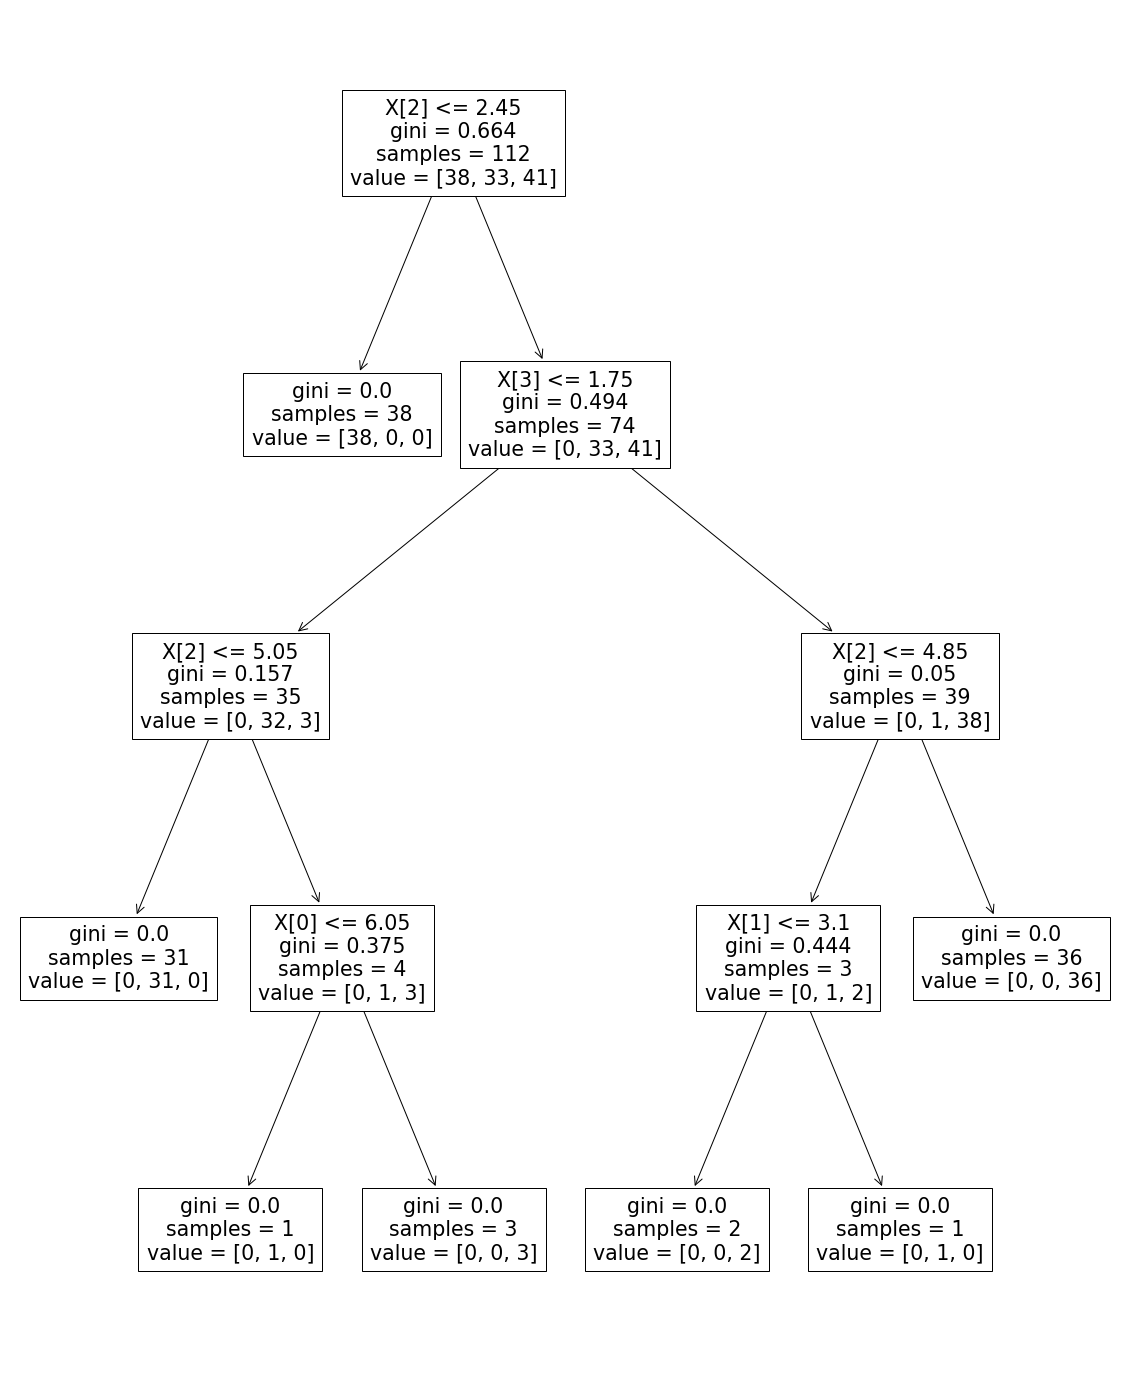

In [10]:
fig = plt.figure(figsize=(20,25))
tree.plot_tree(tree_gini)

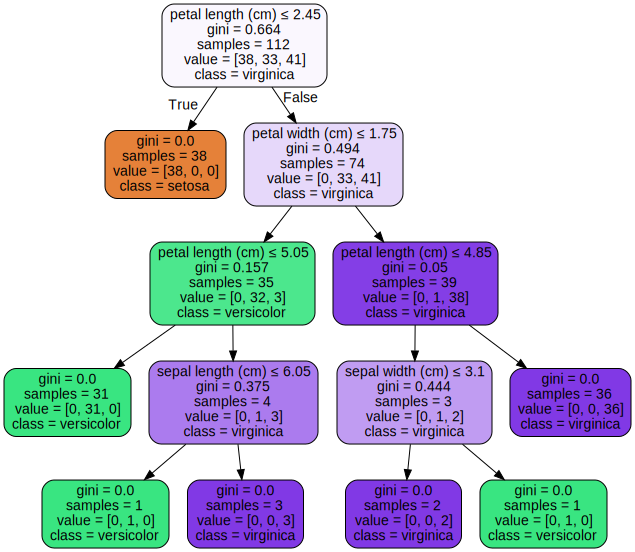

In [11]:
dot_data = tree.export_graphviz(tree_gini, out_file=None,
                                feature_names=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
                                class_names=["setosa", "versicolor", "virginica"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

# GINI


In [12]:
predictions=tree_gini.predict(test[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]])
predictions

array(['setosa', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [13]:
matrix_gini = metrics.confusion_matrix(test["species"], predictions,)
matrix_gini

array([[12,  0,  0],
       [ 0, 17,  0],
       [ 0,  2,  7]], dtype=int64)

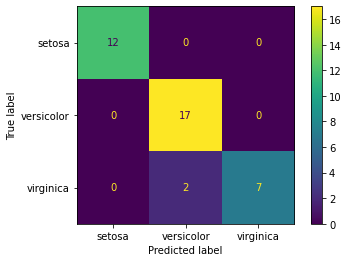

In [14]:
display_gini = ConfusionMatrixDisplay(confusion_matrix=matrix_gini,
                             display_labels=["setosa", "versicolor", "virginica"])
display_gini.plot()

# accuracy score (which is not good eneough)


In [15]:
accuracy_score(test["species"], predictions)

0.9473684210526315

# Prediction scores

In [16]:
precision_score(test["species"], predictions, average=None)

array([1.        , 0.89473684, 1.        ])

In [17]:
precision_score(test["species"], predictions, average='macro')

0.9649122807017544

In [18]:
precision_score(test["species"], predictions, average='micro')

0.9473684210526315

In [19]:
precision_score(test["species"], predictions, average='weighted')

0.9529085872576177

# Recall scores 

In [20]:
recall_score(test["species"], predictions, average=None)

array([1.        , 1.        , 0.77777778])

In [21]:
recall_score(test["species"], predictions, average='macro')

0.9259259259259259

In [22]:
recall_score(test["species"], predictions, average='micro')

0.9473684210526315

In [23]:
recall_score(test["species"], predictions, average='weighted')

0.9473684210526315

#  F1  scores

In [24]:
# they have four types so ı write all of them :)

In [25]:
f1_score(test["species"], predictions, average=None)

array([1.        , 0.94444444, 0.875     ])

In [26]:
f1_score(test["species"], predictions, average='macro')

0.9398148148148149

In [27]:
f1_score(test["species"], predictions, average='micro')

0.9473684210526315

In [28]:
f1_score(test["species"], predictions, average='weighted')

0.9455409356725146


# OVERFITTING

There are some miscalculated data in test data Therefore I believe there isn't overfitting.

# ENTROPY

In [29]:
#trains data with entropy criterion Decision-Tree Classifier
tree_entropy = tree.DecisionTreeClassifier(criterion="entropy")
tree_entropy = tree_entropy.fit(train[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]], train["species"])

[Text(446.4, 1223.1, 'X[2] <= 2.45\nentropy = 1.579\nsamples = 112\nvalue = [38, 33, 41]'),
 Text(334.79999999999995, 951.3, 'entropy = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(558.0, 951.3, 'X[3] <= 1.75\nentropy = 0.992\nsamples = 74\nvalue = [0, 33, 41]'),
 Text(223.2, 679.5, 'X[2] <= 5.05\nentropy = 0.422\nsamples = 35\nvalue = [0, 32, 3]'),
 Text(111.6, 407.69999999999993, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(334.79999999999995, 407.69999999999993, 'X[0] <= 6.05\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(223.2, 135.89999999999986, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.4, 135.89999999999986, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(892.8, 679.5, 'X[2] <= 4.85\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(781.1999999999999, 407.69999999999993, 'X[1] <= 3.1\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(669.5999999999999, 135.89999999999986, 'entropy = 0.0\nsamples = 2\nvalue = [0,

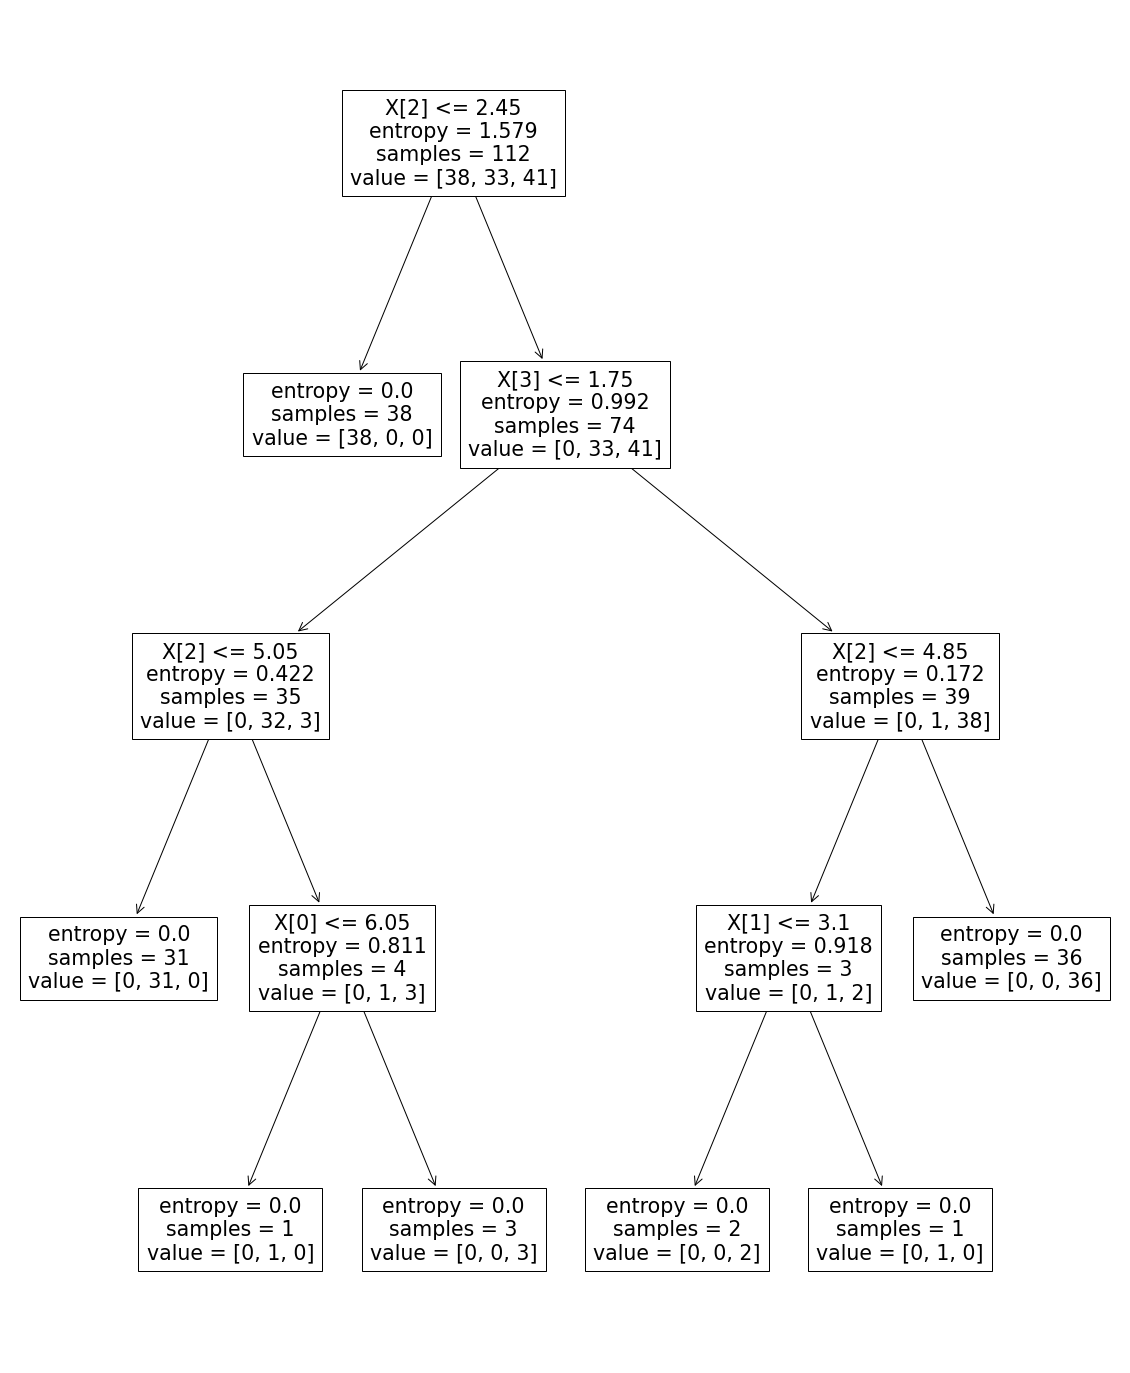

In [30]:
fig = plt.figure(figsize=(20,25))
tree.plot_tree(tree_entropy)

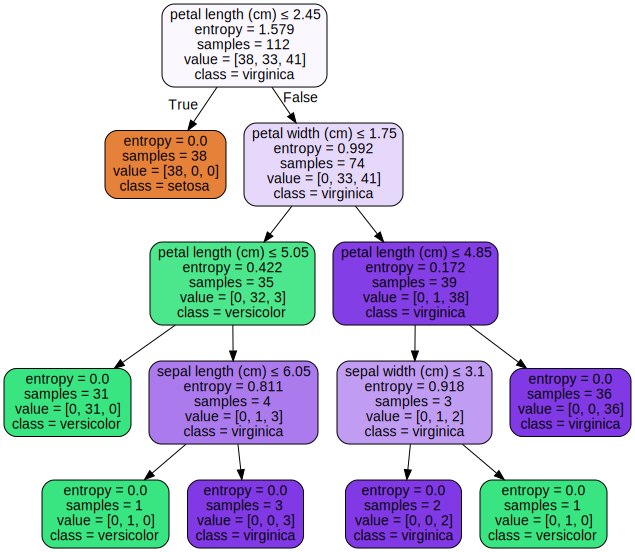

In [31]:
dot_data = tree.export_graphviz(tree_entropy, out_file=None,
                                feature_names=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
                                class_names=["setosa", "versicolor", "virginica"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [32]:
prediction = tree_entropy.predict(test[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]])

In [33]:
matrix_entropy =metrics.confusion_matrix(test["species"], prediction)
matrix_entropy

array([[12,  0,  0],
       [ 0, 17,  0],
       [ 0,  2,  7]], dtype=int64)

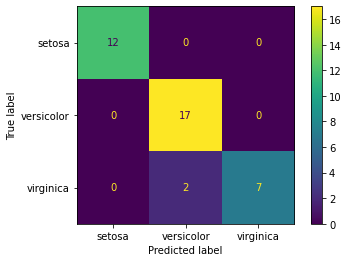

In [34]:
display_entropy = ConfusionMatrixDisplay(confusion_matrix=matrix_entropy,
                             display_labels=["setosa", "versicolor", "virginica"])

display_entropy.plot()

# Accuracy

In [35]:
accuracy_score(test["species"],prediction)

0.9473684210526315


# Precision scores

In [36]:
precision_score(test["species"], prediction, average=None)

array([1.        , 0.89473684, 1.        ])

In [37]:
precision_score(test["species"], prediction, average='macro')

0.9649122807017544

In [38]:
precision_score(test["species"], prediction, average='micro')

0.9473684210526315

In [39]:
precision_score(test["species"], prediction, average='weighted')

0.9529085872576177

# Recall scores

In [40]:
recall_score(test["species"], prediction, average=None)

array([1.        , 1.        , 0.77777778])

In [41]:
recall_score(test["species"], prediction, average='macro')

0.9259259259259259

In [42]:
recall_score(test["species"], prediction, average='micro')

0.9473684210526315

In [43]:
recall_score(test["species"], prediction, average='weighted')

0.9473684210526315

# F1 scores

In [44]:
f1_score(test["species"], prediction, average=None)

array([1.        , 0.94444444, 0.875     ])

In [45]:
f1_score(test["species"], prediction, average='macro')

0.9398148148148149

In [46]:
f1_score(test["species"], prediction, average='micro')

0.9473684210526315

In [47]:
f1_score(test["species"], prediction, average='weighted')

0.9455409356725146

# OVERFITTING

There are some miscalculated data in test data Therefore I believe there isn't overfitting.

# REPORT

1)What is İnformation gain?

Information gain as a measure of how much information a feature provides about a class. Information gain helps to determine the order of attributes in the nodes of a decision tree.Information gain is calculated by comparing the entropy of the dataset before and after a transformation. It is between 1 and 0

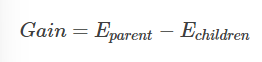

2)What is Gini index?

Gini index  impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.The degree of Gini index varies between 0 and 1, where, 0 denotes that all elements belong to a certain class or if there exists only one class, and 1 denotes that the elements are randomly distributed across various classes.

3)What is Entropy?

Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations. It determines how a decision tree chooses to split data.

calculated by :

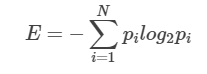

4)What is a confusion matrix?

A confusion matrixs are used to describe the performance of a classification model on a set of test data for which the actual values are known.

Before explain accuracy, precion, recall and f1 scores , lets look at the true-false, positive- negative construct.

Actual values =["True","False"]

Predict valuess = ["Positive","Negative]

“true positive” for correctly predicted event values.

“false positive” for incorrectly predicted event values.

“true negative” for correctly predicted no-event values.

“false negative” for incorrectly predicted no-event values.
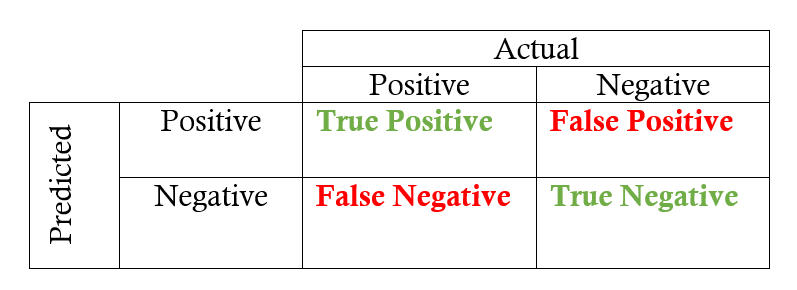




5)What is accuracy?

Accuracy score is calculated by the ratio of the areas we predicted correctly in the model to the total data set.
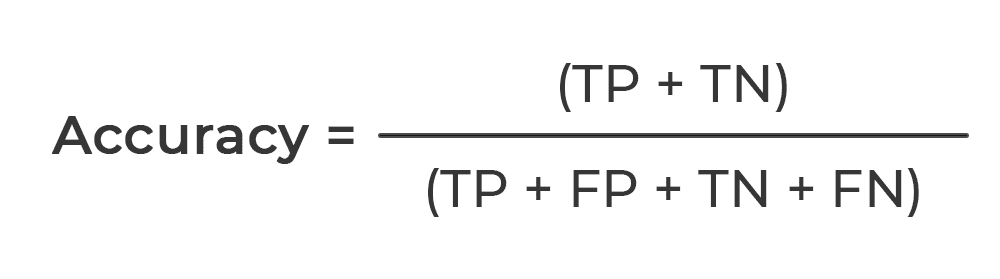

6-7)What is precision and recal?

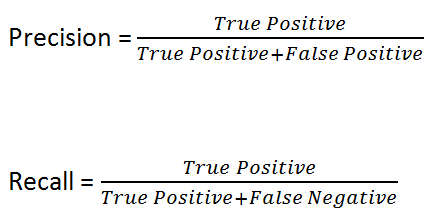

8)What is f1 score?

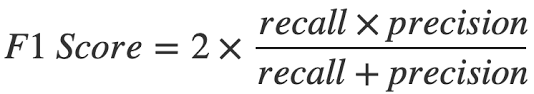

# REFERENCES

https://youtu.be/Anq4PgdASsc

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#:~:text=The%20recall%20is%20the%20ratio,the%20worst%20value%20is%200.

https://www.learnbymarketing.com/481/decision-tree-flavors-gini-info-ga

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

https://blog.clairvoyantsoft.com/entropy-information-gain-and-gini-index-the-crux-of-a-decision-tree-99d0cdc699f4

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

https://graphviz.readthedocs.io/en/stable/manual.html
